In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking shape of dataset
df.shape

(891, 12)

In [4]:
#checking column name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#making summary statistics for the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#1.There are a total of 891 passengers in our dataset

#There are very less mean value for the survived ,it means very less people survived
#The mean of age are around 30,it means maxm middle age people were travelling
#For age min value is 0.42,it means some infants were also travelling (of few months).
#We also notice that age contains some missing values

In [8]:
df['Survived'].unique()
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

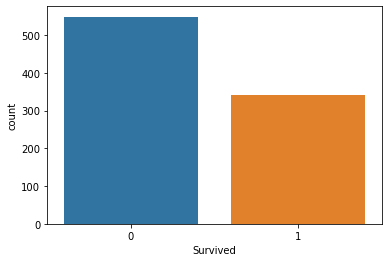

In [9]:
sns.countplot(x='Survived',data=df)

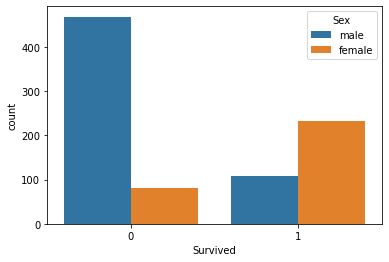

In [10]:
#lets check count of male survived v/s count of female survived

sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

<AxesSubplot:ylabel='Frequency'>

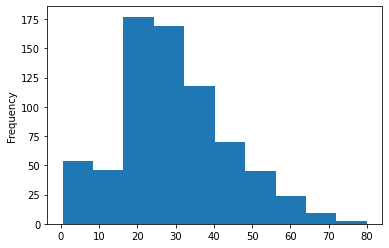

In [11]:
df['Age'].plot.hist()
#it shows more middle age people are travelling on titanic

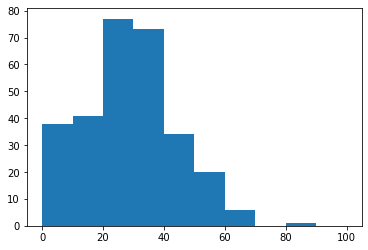

In [12]:
#checking people of which age range maxm survived
plt.hist(x='Age',bins=range(0,110,10),data=df.loc[df['Survived']==1])
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

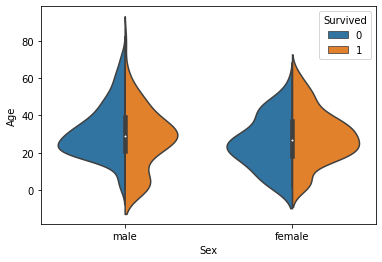

In [13]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)

In [14]:
#The survival rate is-

#1.Good for children

#2.High for women in the age range 20-50

#3.Less for men as the age increases

<AxesSubplot:xlabel='Pclass', ylabel='count'>

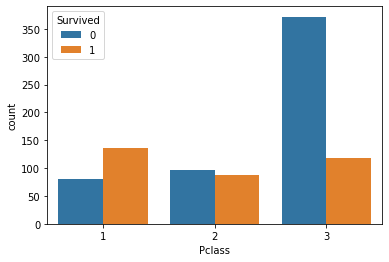

In [15]:
#lets check the no. of people survived or not survived in each class
sns.countplot(x='Pclass',hue='Survived',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

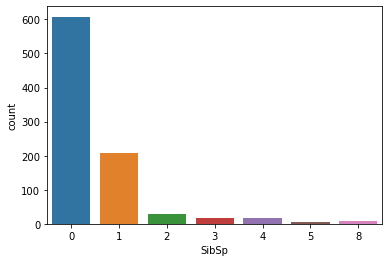

In [16]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

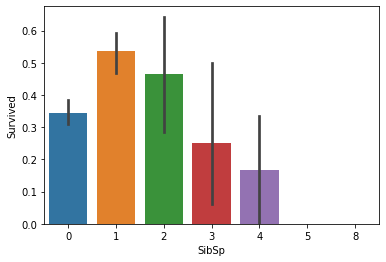

In [17]:
sns.barplot(x='SibSp',y='Survived',data=df)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

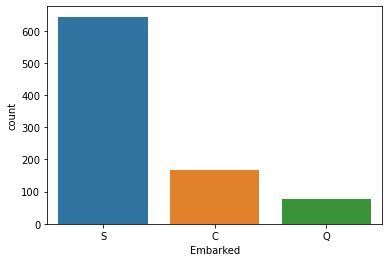

In [19]:
sns.countplot(x='Embarked',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

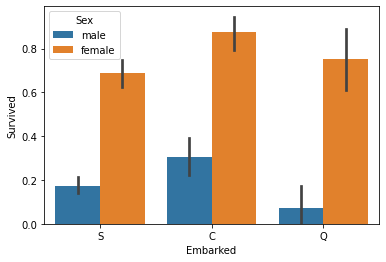

In [20]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=df)

In [21]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Text(0.5, 1.0, 'correlation with target variable')

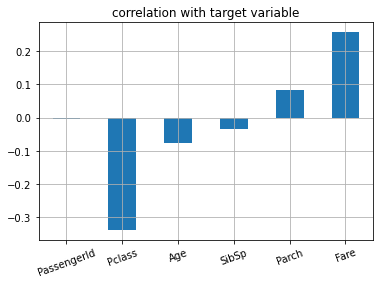

In [23]:
df.drop('Survived',axis=1).corrwith(df['Survived']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

In [24]:
df.drop('Cabin',axis=1,inplace=True)

In [25]:
imp=SimpleImputer(strategy='most_frequent')
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))

In [26]:
im=SimpleImputer(strategy='mean')
df['Age']=im.fit_transform(df['Age'].values.reshape(-1,1))

In [27]:
# we change sex & embarked column to numerical format by using label encoder from sklearn

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list=['Sex','Embarked']
for i in list:
    df[i]=le.fit_transform(df[i].astype(str))
df.head()   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [28]:
#Dropping all the columns that do not provide any meaningful information ,like 'Name','PassengerId','Ticket'
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [29]:
#Checking skewness

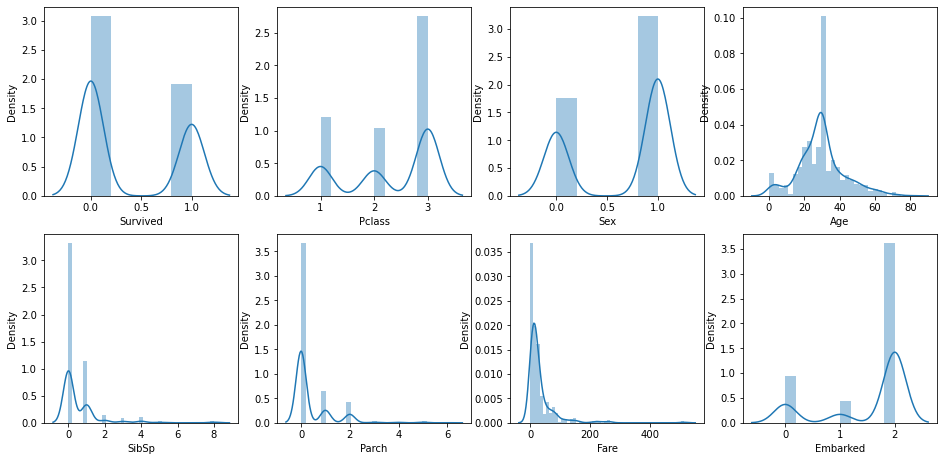

In [30]:
collist=df.columns.values
nrows=4
ncol=4

plt.figure(figsize=(16,16))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [31]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [32]:
#treating skewness via squareroot method and cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [33]:
df.skew()

Survived    0.478523
Pclass     -0.776838
Sex        -0.618921
Age         0.434488
SibSp       1.436526
Parch       1.529799
Fare        2.085004
Embarked   -1.520662
dtype: float64

In [34]:
#Skewness has been removed

In [35]:
#Plotting outliers

Survived        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Pclass       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Sex          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Age          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
SibSp          AxesSubplot(0.125,0.518913;0.168478x0.16413)
Parch       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Fare        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Embarked    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

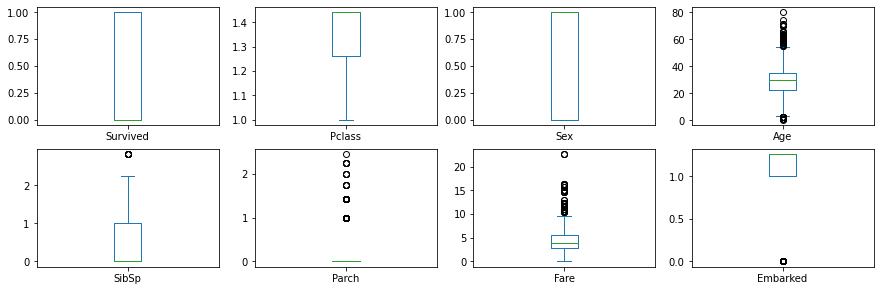

In [36]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

In [37]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(891, 8)
(843, 8)


In [38]:
#Feature Selection
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.44225,1.0,22.0,1.0,0.0,2.692582,1.259921
1,1,1.00000,0.0,38.0,1.0,0.0,8.442944,0.000000
2,1,1.44225,0.0,26.0,0.0,0.0,2.815138,1.259921
3,1,1.00000,0.0,35.0,1.0,0.0,7.286975,1.259921
4,0,1.44225,1.0,35.0,0.0,0.0,2.837252,1.259921


In [39]:
df_new.shape

(843, 8)

In [40]:
#spliting the data into input and output variable
x=df_new.iloc[:,1:]
x.shape

(843, 7)

In [41]:
y=pd.DataFrame(df_new['Survived'])
y.shape

(843, 1)

In [42]:
x_train, x_test, y_train, y_test=train_test_split(x,y)

In [43]:
#scaling the input variable
sc=StandardScaler()
x=sc.fit_transform(x)

In [44]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (632, 7)
x_test_shape: (211, 7)
y_train_shape: (632, 1)
y_test_shape: (211, 1)


In [45]:
#Finding the best parameters

In [46]:
max_accuracy_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict(x_test)
    accuracy_scr=accuracy_score(y_test,lg_pred)
    if accuracy_scr>max_accuracy_score:
        max_accuracy_score=accuracy_scr
        final_r_state=r_state
        
print('max accuracy score corresponding to ',final_r_state,'is',max_accuracy_score)

max accuracy score corresponding to  89 is 0.8402366863905325


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=89)

In [48]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

accuracy_score: 0.8402366863905325
[[94 10]
 [17 48]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       104
           1       0.83      0.74      0.78        65

    accuracy                           0.84       169
   macro avg       0.84      0.82      0.83       169
weighted avg       0.84      0.84      0.84       169



In [49]:
#using GridsearchCV to find the best parmeter in  KNeighborsClassifier
parameters={'n_neighbors':range(22,30)}
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'n_neighbors': 26}


In [50]:
#using GridsearchCV to find the best parmeter in  DecisionTreeClassifier

parameters={'criterion':['gini','entropy'],'random_state':range(42,100)}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 59}


In [51]:
#gridsearchcv for svc
parameters={'kernel':['linear','rbf'],'C':[1,10],'random_state':range(35,100)}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 1, 'kernel': 'rbf', 'random_state': 35}


In [52]:
#models with is best parameters
lg=LogisticRegression(random_state=89)
knn=KNeighborsClassifier(n_neighbors=26)
svc=SVC(kernel='rbf',C=1,random_state=35)
dtc=DecisionTreeClassifier(criterion='entropy',random_state=59)

In [53]:
#all Algorithm by using for loop
model=[lg,knn,svc,dtc]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:',accuracy_score(y_test,predm))
    print('\n')
    print(confusion_matrix(y_test,predm))
    print('\n')
    print(classification_report(y_test,predm))
    print('*************************************************************************************')
    print('\n')

Accuracy score of  LogisticRegression(random_state=89) is: 0.8402366863905325


[[94 10]
 [17 48]]


              precision    recall  f1-score   support

           0       0.85      0.90      0.87       104
           1       0.83      0.74      0.78        65

    accuracy                           0.84       169
   macro avg       0.84      0.82      0.83       169
weighted avg       0.84      0.84      0.84       169

*************************************************************************************


Accuracy score of  KNeighborsClassifier(n_neighbors=26) is: 0.8461538461538461


[[97  7]
 [19 46]]


              precision    recall  f1-score   support

           0       0.84      0.93      0.88       104
           1       0.87      0.71      0.78        65

    accuracy                           0.85       169
   macro avg       0.85      0.82      0.83       169
weighted avg       0.85      0.85      0.84       169

*******************************************************

In [54]:
#cross validate the models
models=[lg,knn,svc,dtc]
for m in models:
    score=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print('Model:',m)
    print('\n')
    print('score:',score)
    print('mean_score:',score.mean())
    print('standard deviation:',score.std())
    print('*****************************************************************************************')
    print('\n')

Model: LogisticRegression(random_state=89)


score: [0.78106509 0.77514793 0.76923077 0.78571429 0.79761905]
mean_score: 0.7817554240631164
standard deviation: 0.009678116247374377
*****************************************************************************************


Model: KNeighborsClassifier(n_neighbors=26)


score: [0.81065089 0.80473373 0.78698225 0.79166667 0.82142857]
mean_score: 0.8030924204001127
standard deviation: 0.012538933263509954
*****************************************************************************************


Model: SVC(C=1, random_state=35)


score: [0.82840237 0.80473373 0.80473373 0.81547619 0.85714286]
mean_score: 0.8220977740208509
standard deviation: 0.019569217215636692
*****************************************************************************************


Model: DecisionTreeClassifier(criterion='entropy', random_state=59)


score: [0.75147929 0.76331361 0.85207101 0.75595238 0.80357143]
mean_score: 0.7852775429698508
standard deviation: 0.038

In [55]:
#Using ensemble technique to boost up our score

In [56]:
#RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,random_state=42)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,labels=[0,1]))


0.8224852071005917
[[95  9]
 [21 44]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       104
           1       0.83      0.68      0.75        65

    accuracy                           0.82       169
   macro avg       0.82      0.80      0.80       169
weighted avg       0.82      0.82      0.82       169



In [57]:
#AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=50,algorithm='SAMME.R')
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8106508875739645
[[90 14]
 [18 47]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       104
           1       0.77      0.72      0.75        65

    accuracy                           0.81       169
   macro avg       0.80      0.79      0.80       169
weighted avg       0.81      0.81      0.81       169



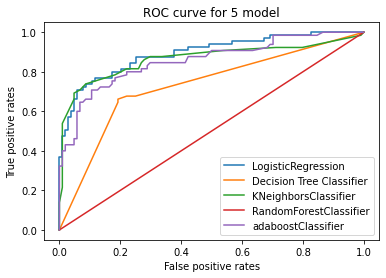

LG AUC score 0.8926035502958579
DTC AUC SCORE 0.7298076923076923
KNN auc score 0.8656065088757398
Random forest classifier 0.8610946745562131
Adaboost classifier 0.8560650887573964


In [58]:
lgpred_prob=lg.predict_proba(x_test)[:,1]
dtcpred_prob=dtc.predict_proba(x_test)[:,1]
knnpred_prob=knn.predict_proba(x_test)[:,1]
rfpred_prob=rf.predict_proba(x_test)[:,1]
adpred_prob=ad.predict_proba(x_test)[:,1]

lg_tpr,lg_fpr,lg_threshold=roc_curve(y_test,lgpred_prob)
dtc_tpr,dtc_fpr,dtc_thresholds=roc_curve(y_test,dtcpred_prob)
knn_tpr,knn_fpr,knn_thresholds=roc_curve(y_test,knnpred_prob)
rf_tpr,rf_fpr,rf_threshold=roc_curve(y_test,rfpred_prob)
ad_tpr,ad_fpr,ad_threshold=roc_curve(y_test,adpred_prob)


plt.plot(lg_tpr,lg_fpr,label='LogisticRegression')
plt.plot(dtc_tpr,dtc_fpr,label ='Decision Tree Classifier')
plt.plot(knn_tpr,knn_fpr,label='KNeighborsClassifier')
plt.plot(rf_tpr,rf_tpr,label='RandomForestClassifier')
plt.plot(ad_tpr,ad_fpr,label='adaboostClassifier')


plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve for 5 model')
plt.legend(loc='best')
plt.show()

print('LG AUC score',roc_auc_score(y_test,lgpred_prob))
print('DTC AUC SCORE',roc_auc_score(y_test,dtcpred_prob))
print('KNN auc score',roc_auc_score(y_test,knnpred_prob))
print('Random forest classifier',roc_auc_score(y_test,rfpred_prob))
print('Adaboost classifier',roc_auc_score(y_test,adpred_prob))

In [59]:
#saving the best model

import joblib
joblib.dump(lg,'titanic.pkl')

['titanic.pkl']